# Time Series Analysis of Oakland Crime Data

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
# Algorithmic Imports
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

In [3]:
#Using data aggregated in another .ipynb
df = pd.read_csv('records-MASTER.csv')
df.set_index('DATE',drop=True,inplace=True)
df.index = pd.to_datetime(df.index,dayfirst=True)
df = df.resample(rule='D').mean()

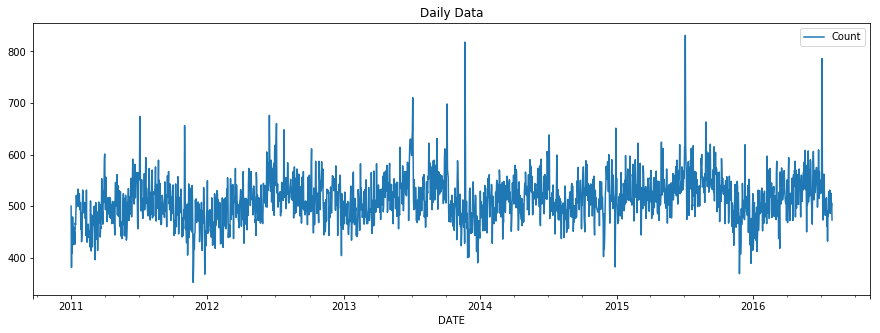

In [4]:
df.plot(figsize=(15,5),title='Daily Data')

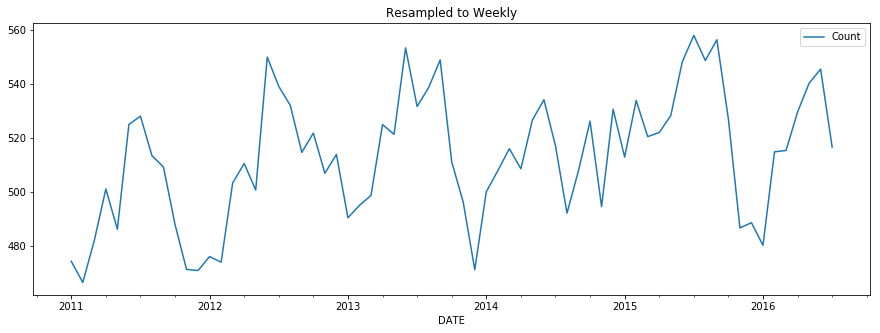

In [17]:
dfW = df.resample(rule='M').mean()
dfW.plot(figsize=(15,5),title='Resampled to Weekly')

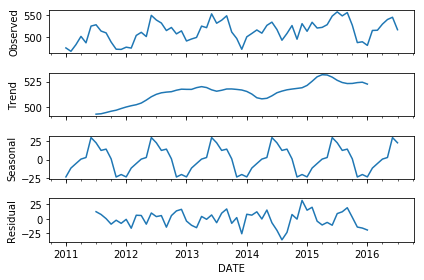

In [18]:
#It is clear that the trend has been very weak over the years.
sd_d = seasonal_decompose(dfW,model='add')  # model='mul' also works
sd_d.plot();

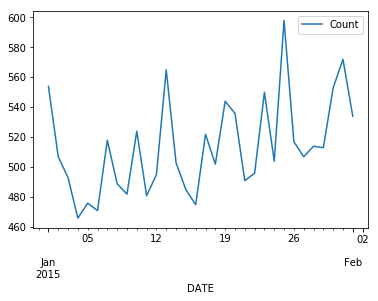

In [19]:
# Check if there is weekly seasonality
df['2015-01-01':'2015-02-01'].plot()

### Notes
- Definitely a Yearly Seasonality
- Weekly, not so sure, which is surprising
- Therefore, will work with Weekly data.
    - Daily would heavily limit the analysis because 365.25 seasonality is too high for a lot of algorithms, and not even be effective because weekly seasonality is hard to notice.
- 2016 Data is partially missing, therefore will be deducted, will perhaps return for the test data
- There are massive spikes that should be worth noting. Perhaps a model robust with exogenous variables for Federal Holidays or Special Events.

In [20]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [21]:
#help(auto_arima)
auto_arima(dfW['Count'],seasonal=True,m=12)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(2, 0, 0, 12), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend=None,
   with_intercept=True)

In [22]:
auto_arima(dfW['Count'],error_action='ignore').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   67
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -287.935
Date:                Sat, 10 Aug 2019   AIC                            581.870
Time:                        16:43:12   BIC                            588.439
Sample:                             0   HQIC                           584.466
                                 - 67                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8619      2.451      0.352      0.725      -3.941       5.665
ar.L1         -0.1811      0.140     -1.296      0.195      -0.455       0.093
sigma2       360.3081     68.929      5.227      0.000     225.209     495.407
===================================================================================
Ljung-Box (Q):                       73.68   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.00   Prob(JB):                         0.85
Heteroskedasticity (H):               1.19   Skew:                            -0.02
Prob(H) (two-sided):                  0.69   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""